## Loading data and placing into dataframes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Loading data from the JSON file
# with open('/Users/jessi/OneDrive/Desktop/classes/Breakthrough Tech AI/Level Data/district A/district.json') as json_data:
with open('/content/drive/MyDrive/Level Data Datasets/district A/district.json') as json_data:
    data = json.load(json_data)

    # Creating dataframes for each category
    benchmarks = pd.DataFrame(data['benchmarks'])
    schools = pd.DataFrame(data['schools'])
    courseSelections = pd.DataFrame(data['courseSections'])
    courseSelectionRoster = pd.DataFrame(data['courseSectionRosters'])
    scores = pd.DataFrame(data['scores'])

In [ ]:
with open('/content/drive/MyDrive/Level Data Datasets/2024-09-11 District A Benchmarks.json') as benchmarks_data:
    data = json.load(benchmarks_data)
    records = data[next(iter(data))]  # Get the list of records
    benchmarks = pd.DataFrame(records)


In [ ]:
with open('/content/drive/MyDrive/Level Data Datasets/2024-09-11 District A Scores.json') as scores_data:
    data = json.load(scores_data)
    # Extracting the actual data
    records = data[next(iter(data))]  # Get the list of records
    # Creating the DataFrame
    scores = pd.DataFrame(records)


## Converting data types into ints where possible to make manipulation and analysis easier

In [ ]:
# Check types of data
dfs = {
    'benchmarks': benchmarks,
    'schools': schools,
    'courseSelections': courseSelections,
    'courseSelectionRoster': courseSelectionRoster,
    'scores': scores
}

In [ ]:
# Convert data to correct types
benchmarks = benchmarks.astype({
    'value': float,
    'year': int,
    'level': int
})

schools = schools.astype({
    'id': int,
    'districtId' : int,
    'costCenter': int,
    'acqRequestSelectable': int,
    'oneRoster_ticketId': int,
})

courseSelections = courseSelections.astype({
    'id': int,
    'year' : int,
    'schoolId': int,
})

courseSelectionRoster = courseSelectionRoster.astype({
    'id': int,
    'courseSectionId' : int,
    'studentId': int,
    'studentLevel': int,
})

columns_to_convert = ['studentId', 'studentLevel', 'year',
       'measurementTypeId', 'subgroup_specialEd', 'subgroup_lunchStatus',
       'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell',
       'subgroup_bottom25', 'value_actMathScore', 'value_actEnglishScore',
       'value_actReadingScore', 'value_actScienceScore',
       'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading',
       'value_nweaEnglish', 'value_iReadyMath', 'value_iReadyReading',
       'value_actMasteryComposite', 'value_actMasteryReading',
       'value_actMasteryMath', 'value_actMasteryScience',
       'value_actMasteryEnglish', 'value_nweaELA', 'value_scantronMath',
       'value_scantronReading', 'value_mapMath', 'value_mapEnglish',
       'value_mapReading', 'value_mapRLA', 'value_scantronScience',
       'value_scantronLanguage', 'value_ReadingFoundations',
       'value_scantronAlgebra', 'value_eocMath', 'value_actELAScore',
       'value_mapScience', 'value_LeapELAScale', 'value_LeapMathScale',
       'value_LeapALScale', 'value_LeapE2Scale', 'value_LeapGmScale',
       'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale',
       'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale',
       'value_accessReadingProficiency', 'value_accessCompositeScale',
       'value_accesscompositeProficiency', 'value_dibelsReading',
       'value_mapHistory', 'value_LEAPSocSci', 'value_scantronGeometry',
       'value_MathMilestones', 'value_ELAMilestones', 'value_starReading',
       'value_starMath', 'value_ScienceMilestones', 'value_LEAPScience',
       'value_SocialMilestones', 'value_gcaInfo', 'value_gcaNar',
       'value_gcaOpin', 'value_aimsWebMath', 'value_aimsWebReading']  # List the columns you want to convert
scores[columns_to_convert] = scores[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Loop through each DataFrame and print its name and dtypes
for df_name, df in dfs.items():
    print(f"DataFrame: {df_name}")
    print(df.dtypes, "\n")

DataFrame: benchmarks
districtId      int64
year            int64
level           int64
dataSource     object
value         float64
dtype: object 

DataFrame: schools
id                      object
name                    object
districtId              object
costCenter              object
abbreviation            object
acqRequestSelectable    object
oneRoster_sourcedId     object
oneRoster_ticketId      object
dtype: object 

DataFrame: courseSelections
id          object
vanityId    object
year        object
schoolId    object
dtype: object 

DataFrame: courseSelectionRoster
id                 object
courseSectionId    object
studentId          object
studentLevel       object
ticket             object
dtype: object 

DataFrame: scores
studentId               int64
studentLevel            int64
year                    int64
measurementTypeId       int64
subgroup_specialEd      int64
                        ...  
value_gcaInfo           int64
value_gcaNar            int64
value_gcaOpi

In [ ]:
scores = scores[['studentId', 'studentLevel', 'year',
       'measurementTypeId','value_scantronMath',
       'value_scantronReading', 'subgroup_specialEd', 'subgroup_lunchStatus',
       'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell',
       'subgroup_bottom25', 'value_actMathScore', 'value_actEnglishScore',
       'value_actReadingScore', 'value_actScienceScore',
       'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading',
       'value_nweaEnglish', 'value_iReadyMath', 'value_iReadyReading',
       'value_actMasteryComposite', 'value_actMasteryReading',
       'value_actMasteryMath', 'value_actMasteryScience',
       'value_actMasteryEnglish', 'value_nweaELA',  'value_mapMath', 'value_mapEnglish',
       'value_mapReading', 'value_mapRLA', 'value_scantronScience',
       'value_scantronLanguage', 'value_ReadingFoundations',
       'value_scantronAlgebra', 'value_eocMath', 'value_actELAScore',
       'value_mapScience', 'value_LeapELAScale', 'value_LeapMathScale',
       'value_LeapALScale', 'value_LeapE2Scale', 'value_LeapGmScale',
       'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale',
       'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale',
       'value_accessReadingProficiency', 'value_accessCompositeScale',
       'value_accesscompositeProficiency', 'value_dibelsReading',
       'value_mapHistory', 'value_LEAPSocSci', 'value_scantronGeometry',
       'value_MathMilestones', 'value_ELAMilestones', 'value_starReading',
       'value_starMath', 'value_ScienceMilestones', 'value_LEAPScience',
       'value_SocialMilestones', 'value_gcaInfo', 'value_gcaNar',
       'value_gcaOpin', 'value_aimsWebMath', 'value_aimsWebReading']]

scores.shape

In [ ]:
scores.shape

(303750, 69)

## Trimming the size of the scores dataframe by removing columns that have all zero values. Keep the top 34 columns that have nonzero values (those with at least 1% of their rows filled). We go from 69 to 34 columns.

###stored in 'scores_keep'

In [ ]:
zero_count_per_column = (scores == 0).sum()
num_scores = scores.shape[0]

# Sort column names by ascending zero values
sorted_columns = zero_count_per_column.sort_values().index.tolist()

# Display the sorted list of column names
# print("Column names sorted by ascending zero values:", sorted_columns)

# Sort by ascending zero counts
sorted_zero_count = zero_count_per_column.sort_values()

# Display the results in ascending order
for column, count in sorted_zero_count.items():
    print(f"Column '{column}' has {(count/num_scores)*100}% zero values.")

#scores_keep = ['value_scantronMath', 'value_scantronReading', 'value_starMath', 'subgroup_lunchStatus', 'subgroup_bottom25', 'value_actMathScore', 'value_actEnglishScore', 'value_actScienceScore', 'value_actReadingScore', 'value_actCompositeScore', 'subgroup_specialEd']


# Create a new DataFrame with the top 30 columns, with zero values < 300,000
scores_keep = sorted_columns[:34]
scores_keep = scores[scores_keep]


Column 'studentId' has 0.0% zero values.
Column 'year' has 0.0026337448559670784% zero values.
Column 'measurementTypeId' has 1.1786008230452676% zero values.
Column 'studentLevel' has 1.7557201646090537% zero values.
Column 'value_scantronMath' has 37.64641975308642% zero values.
Column 'value_scantronReading' has 55.43901234567902% zero values.
Column 'value_MathMilestones' has 84.82995884773663% zero values.
Column 'value_ELAMilestones' has 85.50024691358024% zero values.
Column 'value_LeapELAScale' has 85.77185185185185% zero values.
Column 'value_LeapMathScale' has 86.3120987654321% zero values.
Column 'value_LEAPSocSci' has 92.08098765432099% zero values.
Column 'subgroup_lunchStatus' has 92.86814814814815% zero values.
Column 'value_nweaMath' has 94.16592592592593% zero values.
Column 'value_iReadyMath' has 94.28279835390947% zero values.
Column 'value_iReadyReading' has 94.35028806584363% zero values.
Column 'value_SocialMilestones' has 94.89053497942386% zero values.
Column 'v

In [ ]:
scores.shape

(303750, 69)

In [ ]:
scores_keep.shape

(303750, 34)

In [ ]:
scores_keep.columns

Index(['studentId', 'year', 'measurementTypeId', 'studentLevel',
       'value_scantronMath', 'value_scantronReading', 'value_MathMilestones',
       'value_ELAMilestones', 'value_LeapELAScale', 'value_LeapMathScale',
       'value_LEAPSocSci', 'subgroup_lunchStatus', 'value_nweaMath',
       'value_iReadyMath', 'value_iReadyReading', 'value_SocialMilestones',
       'value_ScienceMilestones', 'subgroup_gender', 'subgroup_ethnicity',
       'value_nweaReading', 'subgroup_specialEd', 'value_starMath',
       'value_mapMath', 'value_mapRLA', 'value_actCompositeScore',
       'value_actMathScore', 'value_actScienceScore', 'value_actEnglishScore',
       'value_actReadingScore', 'subgroup_bottom25', 'value_dibelsReading',
       'value_LeapALScale', 'value_LeapGmScale', 'value_nweaELA'],
      dtype='object')

In [ ]:
# scores_keep contains only the columns with > 1% useful values.
# what is MeasurementTypeId? is there a reference table?
scores_keep.describe()

,studentId,year,measurementTypeId,studentLevel,value_scantronMath,value_scantronReading,value_MathMilestones,value_ELAMilestones,value_LeapELAScale,value_LeapMathScale,...,value_actCompositeScore,value_actMathScore,value_actScienceScore,value_actEnglishScore,value_actReadingScore,subgroup_bottom25,value_dibelsReading,value_LeapALScale,value_LeapGmScale,value_nweaELA
count,303750.000000,303750.000000,303750.000000,303750.000000,253260.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,...,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000
mean,131440.302008,2017.208234,2.757402,6.004998,1353.753873,1184.379088,76.930199,72.340833,107.269761,102.016665,...,0.315253,0.302838,0.310802,0.297587,0.314677,0.016823,1.627549,7.949870,7.663407,6.267480
std,57982.885934,10.375606,1.281897,5.916790,1247.204244,1346.178817,184.741639,178.897702,263.705178,256.420889,...,2.418425,2.334394,2.420651,2.362907,2.483732,0.128608,18.322074,76.579856,74.940800,63.973843
min,44774.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85484.000000,2017.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121078.000000,2017.000000,3.000000,6.000000,2054.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,169950.000000,2018.000000,3.000000,8.000000,2522.000000,2656.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,259514.000000,2020.000000,7.000000,99.000000,3700.000000,3700.000000,815.000000,775.000000,850.000000,850.000000,...,35.000000,36.000000,36.000000,36.000000,36.000000,1.000000,499.000000,850.000000,850.000000,898.000000


In [ ]:
#Percentage breakdowns
grade_breakdown = scores_keep['studentLevel'].value_counts(normalize=True) * 100
year_breakdown = scores_keep['year'].value_counts(normalize=True) * 100

# test breakdown
columns_of_interest = ['value_scantronMath', 'value_scantronReading', 'value_MathMilestones',
       'value_ELAMilestones', 'value_LeapELAScale', 'value_LeapMathScale',
       'value_LEAPSocSci', 'subgroup_lunchStatus', 'value_nweaMath',
       'value_iReadyMath', 'value_iReadyReading', 'value_SocialMilestones',
       'value_ScienceMilestones', 'subgroup_gender', 'subgroup_ethnicity',
       'value_nweaReading', 'subgroup_specialEd', 'value_starMath',
       'value_mapMath', 'value_mapRLA', 'value_actCompositeScore',
       'value_actMathScore', 'value_actScienceScore', 'value_actEnglishScore',
       'value_actReadingScore', 'subgroup_bottom25', 'value_dibelsReading',
       'value_LeapALScale', 'value_LeapGmScale', 'value_nweaELA']

# Calculate the total number of rows in the DataFrame
total_rows = len(scores)

# Calculate the percentage of non-zero values for each column
test_breakdown = scores_keep[columns_of_interest].astype(bool).sum(axis=0) / total_rows * 100

print(grade_breakdown)
print(year_breakdown)
print(test_breakdown)

studentLevel
 4     12.924115
 5     12.856955
 3     12.826337
 6     12.612016
 7     12.314733
 8     12.087572
 2      5.626008
 10     4.589630
 9      4.407572
 11     3.896296
 1      2.702222
 0      1.755720
 12     1.071276
 98     0.215309
 99     0.090535
 97     0.019424
 96     0.002963
-1      0.001317
Name: proportion, dtype: float64
year
2017    50.011852
2018    38.287078
2016    10.847407
2015     0.401646
2014     0.308148
2020     0.141235
0        0.002634
Name: proportion, dtype: float64
value_scantronMath         62.353580
value_scantronReading      44.560988
value_MathMilestones       15.170041
value_ELAMilestones        14.499753
value_LeapELAScale         14.228148
value_LeapMathScale        13.687901
value_LEAPSocSci            7.919012
subgroup_lunchStatus        7.131852
value_nweaMath              5.834074
value_iReadyMath            5.717202
value_iReadyReading         5.649712
value_SocialMilestones      5.109465
value_ScienceMilestones     5.044609
sub

### We want to know if there are score metrics that contain a significant amount of data, but arent listed in benchmarks['dataSource']. (TA)

The result is that a few columns have a non-negligible number of points (>1,000). It might be helpful to have benchmark values for these tests as well.

- scores_to_add = List of metrics with >1,000 points

In [ ]:
# metrics not in benchmarks['dataSource']
missing_metrics = scores.columns.difference(benchmarks['dataSource'])
missing_metrics_df = scores[missing_metrics]
print(missing_metrics_df.columns)

Index(['measurementTypeId', 'studentId', 'studentLevel', 'subgroup_bottom25',
       'subgroup_ell', 'subgroup_ethnicity', 'subgroup_gender',
       'subgroup_lunchStatus', 'subgroup_specialEd', 'value_E1Scale',
       'value_ELAMilestones', 'value_LEAPScience', 'value_LEAPSocSci',
       'value_LeapALScale', 'value_LeapBlScale', 'value_LeapE2Scale',
       'value_LeapE3Scale', 'value_LeapELAScale', 'value_LeapGmScale',
       'value_LeapMathScale', 'value_LeapUsScale', 'value_MathMilestones',
       'value_ReadingFoundations', 'value_ScienceMilestones',
       'value_SocialMilestones', 'value_UsEsScale',
       'value_accessCompositeScale', 'value_accessReadingProficiency',
       'value_accessReadingScale', 'value_accesscompositeProficiency',
       'value_actELAScore', 'value_actMasteryComposite',
       'value_actMasteryEnglish', 'value_actMasteryMath',
       'value_actMasteryReading', 'value_actMasteryScience',
       'value_aimsWebMath', 'value_aimsWebReading', 'value_dibelsRead

In [ ]:
zero_count_per_column = (missing_metrics_df == 0).sum()
num_scores = missing_metrics_df.shape[0]
print(num_scores)

# Sort column names by ascending zero values
sorted_columns = zero_count_per_column.sort_values().index.tolist()

# Sort by ascending zero counts
sorted_zero_count = zero_count_per_column.sort_values()

# Display the results in ascending order
for column, count in sorted_zero_count.items():
    print(f"Column '{column}' has {num_scores - count} values.")
    # print(f"Column '{column}' has {(count/num_scores)*100}% zero values.")
    # print(f"Column '{column}' has {count} zero values.")

303750
Column 'studentId' has 303750 values.
Column 'year' has 303742 values.
Column 'measurementTypeId' has 300170 values.
Column 'studentLevel' has 298417 values.
Column 'value_MathMilestones' has 46079 values.
Column 'value_ELAMilestones' has 44043 values.
Column 'value_LeapELAScale' has 43218 values.
Column 'value_LeapMathScale' has 41577 values.
Column 'value_LEAPSocSci' has 24054 values.
Column 'subgroup_lunchStatus' has 21663 values.
Column 'value_nweaMath' has 17721 values.
Column 'value_iReadyMath' has 17366 values.
Column 'value_iReadyReading' has 17161 values.
Column 'value_SocialMilestones' has 15520 values.
Column 'value_ScienceMilestones' has 15323 values.
Column 'subgroup_gender' has 14512 values.
Column 'subgroup_ethnicity' has 14512 values.
Column 'value_nweaReading' has 14369 values.
Column 'subgroup_specialEd' has 13467 values.
Column 'value_mapMath' has 11856 values.
Column 'value_mapRLA' has 8989 values.
Column 'subgroup_bottom25' has 5110 values.
Column 'value_dib

In [ ]:
scores_to_add = sorted_zero_count[sorted_zero_count <= 302548] #number comes from the first column that had over 1,000 nonzero points (mapScience)
scores_to_add = scores_to_add.index.tolist()
scores_to_add = scores_to_add[4:]

# metrics that have more than 1000 points that arent mentioned in the benchmarks dataset.
print((scores_to_add))

['value_MathMilestones', 'value_ELAMilestones', 'value_LeapELAScale', 'value_LeapMathScale', 'value_LEAPSocSci', 'subgroup_lunchStatus', 'value_nweaMath', 'value_iReadyMath', 'value_iReadyReading', 'value_SocialMilestones', 'value_ScienceMilestones', 'subgroup_gender', 'subgroup_ethnicity', 'value_nweaReading', 'subgroup_specialEd', 'value_mapMath', 'value_mapRLA', 'subgroup_bottom25', 'value_dibelsReading', 'value_LeapALScale', 'value_LeapGmScale', 'value_nweaELA', 'value_starReading', 'value_LeapE2Scale', 'value_mapReading', 'value_E1Scale', 'value_scantronLanguage', 'value_LeapBlScale', 'value_LeapE3Scale', 'value_scantronScience', 'value_LeapUsScale', 'value_mapScience']


## Next we want to check for columns with values outside the scope of the Benchmarks dataframe. This includes years outside the range of 2017-2018 as well as grades that are not 3-8 and 11. Keep this new dataframe in scores_filtered. Fill in the NaNs with zeros.

In [ ]:
# track unique values to see what rows should be removed

# Get unique values for each column
unique_values = scores_keep.apply(lambda x: x.unique())

# Display the unique values
for column, values in unique_values.items():
    print(f"{column}: {values}")

studentId: [ 44774  44775  44776 ... 259512 259513 259514]
year: [2018 2017 2020 2015 2016 2014    0]
measurementTypeId: [6 4 5 0 3 1 2 7]
studentLevel: [ 9  8  6  7  5 12 11 10  4  3  2  1  0 99 98 97 96 -1]
value_scantronMath: [   0. 2841. 2808. ... 3442. 3389. 3341.]
value_scantronReading: [   0 2950 2936 ... 3519 3560 3651]
value_MathMilestones: [  0 505 530 421 415 479 443 413 463 446 498 475 442 454 409 398 433 423
 453 496 424 512 507 490 456 485 466 486 482 448 503 495 451 489 452 500
 493 438 483 545 524 510 549 439 518 538 468 523 572 471 517 476 502 447
 519 522 562 550 560 434 422 460 506 537 534 526 508 459 478 474 513 492
 464 536 521 429 597 480 465 494 509 491 515 542 520 441 472 527 484 577
 554 383 546 547 467 419 437 427 487 501 420 432 555 455 516 528 578 559
 551 449 531 596 582 606 543 481 477 497 539 444 470 436 461 469 511 514
 552 565 576 548 504 556 435 430 540 535 592 473 462 499 394 558 425 573
 598 588 529 584 544 561 627 568 553 488 416 575 574 532 405 445

In [ ]:
# benchmarks only accounts for data from 2017-2018, remove data from years other than that
# remove data from grades 96-99, -1, 0, 1, 2 since benchmarks only account for grades 3-8, 11
#

# Define the conditions for removal
conditions = (
    (scores_keep['year'] < 2017) |
    (scores_keep['year'] > 2018) |
    (scores_keep['studentLevel'].isin([-1, 0, 1, 2, 9, 10, 12, 96, 97, 98, 99]))
)

# Remove rows where the conditions are met
scores_filtered = scores_keep[~conditions]

In [ ]:
benchmarks['level'].unique()

array([ 3,  4,  5,  6,  7,  8, 11])

In [ ]:
scores_filtered['studentLevel'].unique()

array([ 8,  6,  7,  5, 11,  4,  3])

In [ ]:
scores_filtered.shape

(213153, 34)

In [ ]:
# replace NaNs with zeros
# value_scantronMath is the only column with NaN values, replace with zeros

nan_count = np.sum(scores_filtered.isnull())
scores_filtered['value_scantronMath'].fillna(value=0, inplace=True)
nan_count = np.sum(scores_keep.isnull())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-24-80d5a0fa31bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_filtered['value_scantronMath'].fillna(value=0, inplace=True)


In [ ]:
scores_filtered

,studentId,year,measurementTypeId,studentLevel,value_scantronMath,value_scantronReading,value_MathMilestones,value_ELAMilestones,value_LeapELAScale,value_LeapMathScale,...,value_actCompositeScore,value_actMathScore,value_actScienceScore,value_actEnglishScore,value_actReadingScore,subgroup_bottom25,value_dibelsReading,value_LeapALScale,value_LeapGmScale,value_nweaELA
1,44774,2017,6,8,2841.0,2950,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
2,44774,2017,4,8,2808.0,2936,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
3,44775,2017,4,8,2580.0,2660,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
4,44775,2017,6,8,2705.0,2670,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
7,44776,2017,6,8,2335.0,2331,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303745,259510,2018,3,5,0.0,0,481,464,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
303746,259511,2018,3,5,0.0,0,490,463,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
303747,259512,2018,3,5,0.0,0,450,435,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
303748,259513,2018,3,5,0.0,0,494,477,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0


In [ ]:
# Count the number of rows for each unique value in 'studentLevel'
student_level_counts = scores_filtered['studentLevel'].value_counts()

# Display the counts
print("Count of rows for each unique studentLevel:")
print(student_level_counts)

# make sure totals add up to all rows in scores_filtered
total_count = student_level_counts.sum()
print(total_count)
print(scores_filtered.shape)

Count of rows for each unique studentLevel:
studentLevel
4     34799
5     34688
3     34331
6     34033
7     33225
8     32517
11     9560
Name: count, dtype: int64
213153
(213153, 34)


### Split up scores_filtered into several dataframes, based on:
### - year (2)
### - year and grade (14)
### - year, grade, and value (294 -> 188 -> 49)

### *subgroups still need to be processed

Since we have a large number of dataframes for year/level/value, trim them by removing the DFs with all 0 values, leaving us with 188. Still too many, trim further by removing DFs with > 80% zero values, leaving us with 49 DFs, a much more manageable amount.

In [ ]:
# split scores_filtered up into years
scores_2017 = scores_filtered[scores_filtered['year'] == 2017]
scores_2018 = scores_filtered[scores_filtered['year'] == 2018]


#split scores_2017/2018 into grades
grades = [3, 4, 5, 6, 7, 8, 11]
scores_year_level = {}  # Dictionary to store DataFrames for both years

for grade in grades:
    scores_year_level[f'scores_2017_{grade}'] = scores_2017[scores_2017['studentLevel'] == grade]
    scores_year_level[f'scores_2018_{grade}'] = scores_2018[scores_2018['studentLevel'] == grade]

#split grades into "value_" columns
scores_year_level_value = {}

# Iterate through the scores_year_level dictionary
for key, df in scores_year_level.items():
    # Filter columns that start with "value_"
    value_columns = [col for col in df.columns if col.startswith('value_')]

    # Store DataFrames for each value column in a nested dictionary
    for value_col in value_columns:
        # Create a unique key for each value DataFrame
        value_key = f'{key}_{value_col}'
        scores_year_level_value[value_key] = df[[value_col]]  # Store only the value column

In [ ]:
print(list(scores_year_level.keys()))
print(len(scores_year_level))
print(list(scores_year_level_value.keys()))
print(len(scores_year_level_value))

#this is way too many dfs. time to trim them down

['scores_2017_3', 'scores_2018_3', 'scores_2017_4', 'scores_2018_4', 'scores_2017_5', 'scores_2018_5', 'scores_2017_6', 'scores_2018_6', 'scores_2017_7', 'scores_2018_7', 'scores_2017_8', 'scores_2018_8', 'scores_2017_11', 'scores_2018_11']
14
['scores_2017_3_value_scantronMath', 'scores_2017_3_value_scantronReading', 'scores_2017_3_value_MathMilestones', 'scores_2017_3_value_ELAMilestones', 'scores_2017_3_value_LeapELAScale', 'scores_2017_3_value_LeapMathScale', 'scores_2017_3_value_LEAPSocSci', 'scores_2017_3_value_nweaMath', 'scores_2017_3_value_iReadyMath', 'scores_2017_3_value_iReadyReading', 'scores_2017_3_value_SocialMilestones', 'scores_2017_3_value_ScienceMilestones', 'scores_2017_3_value_nweaReading', 'scores_2017_3_value_starMath', 'scores_2017_3_value_mapMath', 'scores_2017_3_value_mapRLA', 'scores_2017_3_value_actCompositeScore', 'scores_2017_3_value_actMathScore', 'scores_2017_3_value_actScienceScore', 'scores_2017_3_value_actEnglishScore', 'scores_2017_3_value_actReading

In [ ]:
# remove DFs with all 0 values
zero_value_dfs = []

# Check each DataFrame in scores_year_level_value
for key, df in scores_year_level_value.items():
    if df.eq(0).all().all():  # Check if all values are 0
        zero_value_dfs.append(key)  # Store the DataFrame name if all values are 0

# # Display results
# if zero_value_dfs:
#     print("DataFrames containing only 0 values:")
#     for name in zero_value_dfs:
#         print(name)
# else:
#     print("No DataFrames contain only 0 values.")


In [ ]:
# Delete DataFrames with all zero values from scores_year_level_value
for name in zero_value_dfs:
    if name in scores_year_level_value:  # Check if the name exists in the dictionary
        del scores_year_level_value[name]  # Delete the DataFrame

In [ ]:
# an improvement but still a lot of dfs. trim down further
len(scores_year_level_value)

203

In [ ]:
# for each grade in each year, there are a different number of students, resulting in differing df sizes
for key, df in scores_year_level_value.items():
  print(str(key) ,df.shape)

scores_2017_3_value_scantronMath (20100, 1)
scores_2017_3_value_scantronReading (20100, 1)
scores_2017_3_value_MathMilestones (20100, 1)
scores_2017_3_value_ELAMilestones (20100, 1)
scores_2017_3_value_LeapELAScale (20100, 1)
scores_2017_3_value_LeapMathScale (20100, 1)
scores_2017_3_value_LEAPSocSci (20100, 1)
scores_2017_3_value_nweaMath (20100, 1)
scores_2017_3_value_iReadyMath (20100, 1)
scores_2017_3_value_iReadyReading (20100, 1)
scores_2017_3_value_mapMath (20100, 1)
scores_2017_3_value_mapRLA (20100, 1)
scores_2017_3_value_nweaELA (20100, 1)
scores_2018_3_value_scantronMath (14231, 1)
scores_2018_3_value_scantronReading (14231, 1)
scores_2018_3_value_MathMilestones (14231, 1)
scores_2018_3_value_ELAMilestones (14231, 1)
scores_2018_3_value_LeapELAScale (14231, 1)
scores_2018_3_value_LeapMathScale (14231, 1)
scores_2018_3_value_LEAPSocSci (14231, 1)
scores_2018_3_value_nweaMath (14231, 1)
scores_2018_3_value_iReadyMath (14231, 1)
scores_2018_3_value_iReadyReading (14231, 1)
scor

In [ ]:
#remove dataframes with more than 80% zero values
dfs_to_remove = []

# Check each DataFrame in scores_year_level_value
for key, df in scores_year_level_value.items():
    total_rows = len(df)  # Get the total number of rows
    zero_count = df.eq(0).sum().sum()  # Count total number of zeros

    # Calculate the proportion of zeros
    if total_rows > 0:  # Avoid division by zero
        proportion_zeros = zero_count / total_rows
        if proportion_zeros > 0.8:  # Check if more than 80% are zeros
            dfs_to_remove.append(key)  # Add to removal list

# Remove DataFrames from the dictionary
for name in dfs_to_remove:
    del scores_year_level_value[name]

print(dfs_to_remove)

['scores_2017_3_value_LeapELAScale', 'scores_2017_3_value_LeapMathScale', 'scores_2017_3_value_LEAPSocSci', 'scores_2017_3_value_nweaMath', 'scores_2017_3_value_iReadyMath', 'scores_2017_3_value_iReadyReading', 'scores_2017_3_value_mapMath', 'scores_2017_3_value_mapRLA', 'scores_2017_3_value_nweaELA', 'scores_2018_3_value_MathMilestones', 'scores_2018_3_value_ELAMilestones', 'scores_2018_3_value_LeapELAScale', 'scores_2018_3_value_LeapMathScale', 'scores_2018_3_value_LEAPSocSci', 'scores_2018_3_value_nweaMath', 'scores_2018_3_value_iReadyMath', 'scores_2018_3_value_iReadyReading', 'scores_2018_3_value_nweaReading', 'scores_2018_3_value_starMath', 'scores_2018_3_value_dibelsReading', 'scores_2017_4_value_LeapELAScale', 'scores_2017_4_value_LeapMathScale', 'scores_2017_4_value_LEAPSocSci', 'scores_2017_4_value_nweaMath', 'scores_2017_4_value_iReadyMath', 'scores_2017_4_value_iReadyReading', 'scores_2017_4_value_nweaReading', 'scores_2017_4_value_mapMath', 'scores_2017_4_value_mapRLA', 's

In [ ]:
for key in scores_year_level_value:
    print(key)

scores_2017_3_value_scantronMath
scores_2017_3_value_scantronReading
scores_2017_3_value_MathMilestones
scores_2017_3_value_ELAMilestones
scores_2018_3_value_scantronMath
scores_2018_3_value_scantronReading
scores_2017_4_value_scantronMath
scores_2017_4_value_scantronReading
scores_2017_4_value_MathMilestones
scores_2017_4_value_ELAMilestones
scores_2018_4_value_scantronMath
scores_2018_4_value_scantronReading
scores_2017_5_value_scantronMath
scores_2017_5_value_scantronReading
scores_2017_5_value_MathMilestones
scores_2017_5_value_ELAMilestones
scores_2017_5_value_SocialMilestones
scores_2017_5_value_ScienceMilestones
scores_2018_5_value_scantronMath
scores_2018_5_value_scantronReading
scores_2017_6_value_scantronMath
scores_2017_6_value_scantronReading
scores_2017_6_value_MathMilestones
scores_2017_6_value_ELAMilestones
scores_2018_6_value_scantronMath
scores_2018_6_value_scantronReading
scores_2017_7_value_scantronMath
scores_2017_7_value_scantronReading
scores_2017_7_value_MathMile

In [ ]:
scores_year_level_value['scores_2017_11_value_actCompositeScore']

,value_actCompositeScore
1439,18.0
4808,22.0
4809,35.0
4852,27.0
5017,16.0
...,...
272701,0.0
272702,0.0
272703,0.0
272704,0.0


### Start by graphing all 49 DFs by score vs. frequency in a grid format. Since this is hard to read, combine the scantronMath/Reading graphs by grade level and year.

In [ ]:
# Initialize an empty dictionary to store the benchmark scores
benchmark_scores = {}

# Iterate over each row in the DataFrame
for index, row in benchmarks.iterrows():
    # Construct the key as 'score_{year}_{level}_{dataSource}'
    key = f"scores_{row['year']}_{row['level']}_{row['dataSource']}"

    # Assign the value to the corresponding key in the dictionary
    benchmark_scores[key] = row['value']

# Now benchmark_scores contains the desired key-value pairs
print(benchmark_scores)

{'scores_2017_3_value_scantronMath': 2356.0, 'scores_2017_3_value_scantronReading': 2563.0, 'scores_2017_4_value_scantronMath': 2493.0, 'scores_2017_4_value_scantronReading': 2674.0, 'scores_2017_5_value_scantronMath': 2584.0, 'scores_2017_5_value_scantronReading': 2841.0, 'scores_2017_6_value_scantronMath': 2675.0, 'scores_2017_6_value_scantronReading': 2897.0, 'scores_2017_7_value_scantronMath': 2766.0, 'scores_2017_7_value_scantronReading': 3008.0, 'scores_2017_8_value_scantronMath': 2823.0, 'scores_2017_8_value_scantronReading': 3063.0, 'scores_2017_11_value_actCompositeScore': 19.5, 'scores_2018_3_value_scantronMath': 2364.0, 'scores_2018_3_value_scantronReading': 2518.0, 'scores_2018_3_value_aspireReadingScaleScore': 250.0, 'scores_2018_3_value_starMath': 1900.0, 'scores_2018_4_value_scantronMath': 2488.0, 'scores_2018_4_value_scantronReading': 2678.0, 'scores_2018_4_value_aspireReadingScaleScore': 260.0, 'scores_2018_4_value_starMath': 2488.0, 'scores_2018_5_value_scantronMath':

In [ ]:
benchmark_scores['scores_2017_3_value_scantronMath']

2356.0

<ipython-input-65-1efc2a440758>:61: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


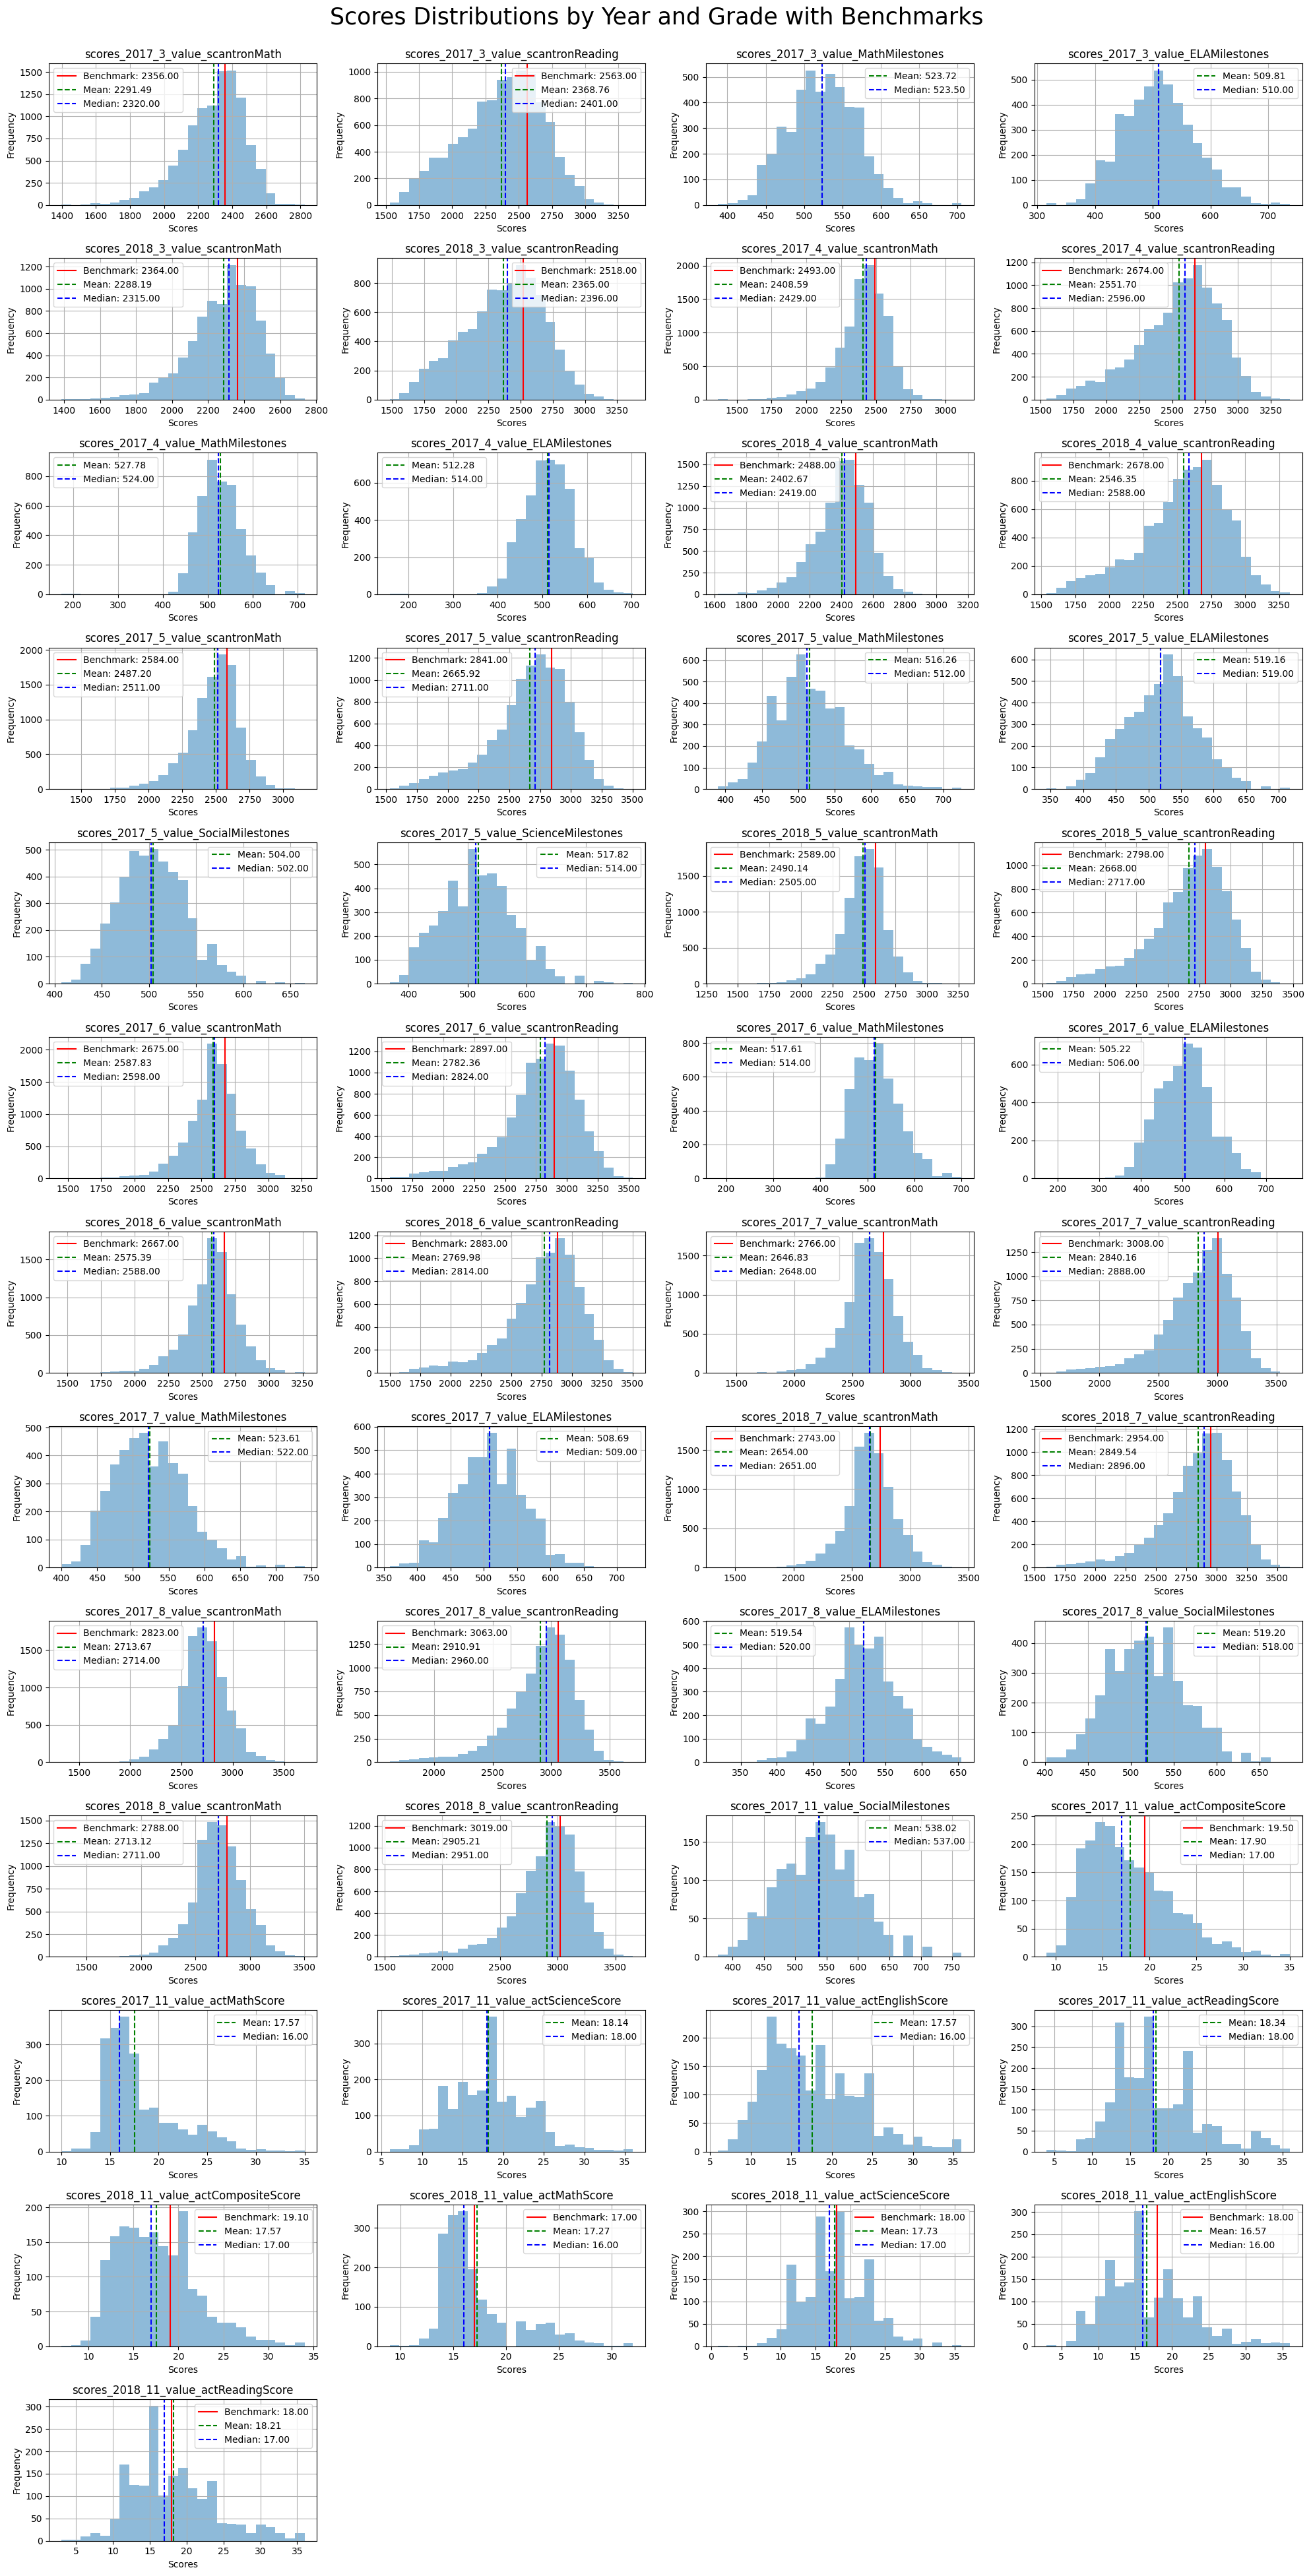

In [ ]:
# List of grade levels
grades = [3, 4, 5, 6, 7, 8, 11]

# Define the number of rows and columns for the subplot grid
n_rows = 13  # One row for each grade
n_cols = 4  # Adjust the columns based on how many graphs you want per row
figsize = (20, n_rows * 3)  # Adjust the figure size

# Create the figure and axes for the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
fig.suptitle('Scores Distributions by Year and Grade with Benchmarks', fontsize=25, y=1)

# Flatten the axs array so we can index it linearly
axs = axs.flatten()

# Keep track of subplot position
plot_num = 0

# Loop through each DataFrame in scores_year_level_value
for key, df in scores_year_level_value.items():

    # Flatten the data and filter non-zero values
    data = df.values.flatten()
    data = data[data > 0]  # Keep only values > 0

    if len(data) > 0:  # Ensure there's data to plot
        ax = axs[plot_num]  # Select the current axis

        # Create histogram using frequency
        ax.hist(data, bins=25, alpha=0.5)

        # Add a vertical line at the benchmark
        if key in benchmark_scores and benchmark_scores[key] is not None:
          ax.axvline(benchmark_scores[key], color='red', linestyle='-', label=f'Benchmark: {benchmark_scores[key]:.2f}')

        # Calculate the mean/median of the dataset
        mean_value = np.mean(data)
        ax.axvline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value:.2f}')
        median_value = np.median(data)
        ax.axvline(median_value, color='blue', linestyle='--', label=f'Median: {median_value:.2f}')



        # Set the title as the name of the DataFrame
        ax.set_title(key)

        # Add labels and grid
        ax.set_xlabel('Scores')
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(True)

        # Move to the next subplot
        plot_num += 1

# Remove any unused subplots if there are fewer DataFrames than grid cells
for i in range(plot_num, len(axs)):
    fig.delaxes(axs[i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
axs[0]

<Axes: title={'center': 'scores_2017_3_value_scantronMath'}, xlabel='Scores', ylabel='Frequency'>

<ipython-input-37-fa8322b9bee7>:63: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


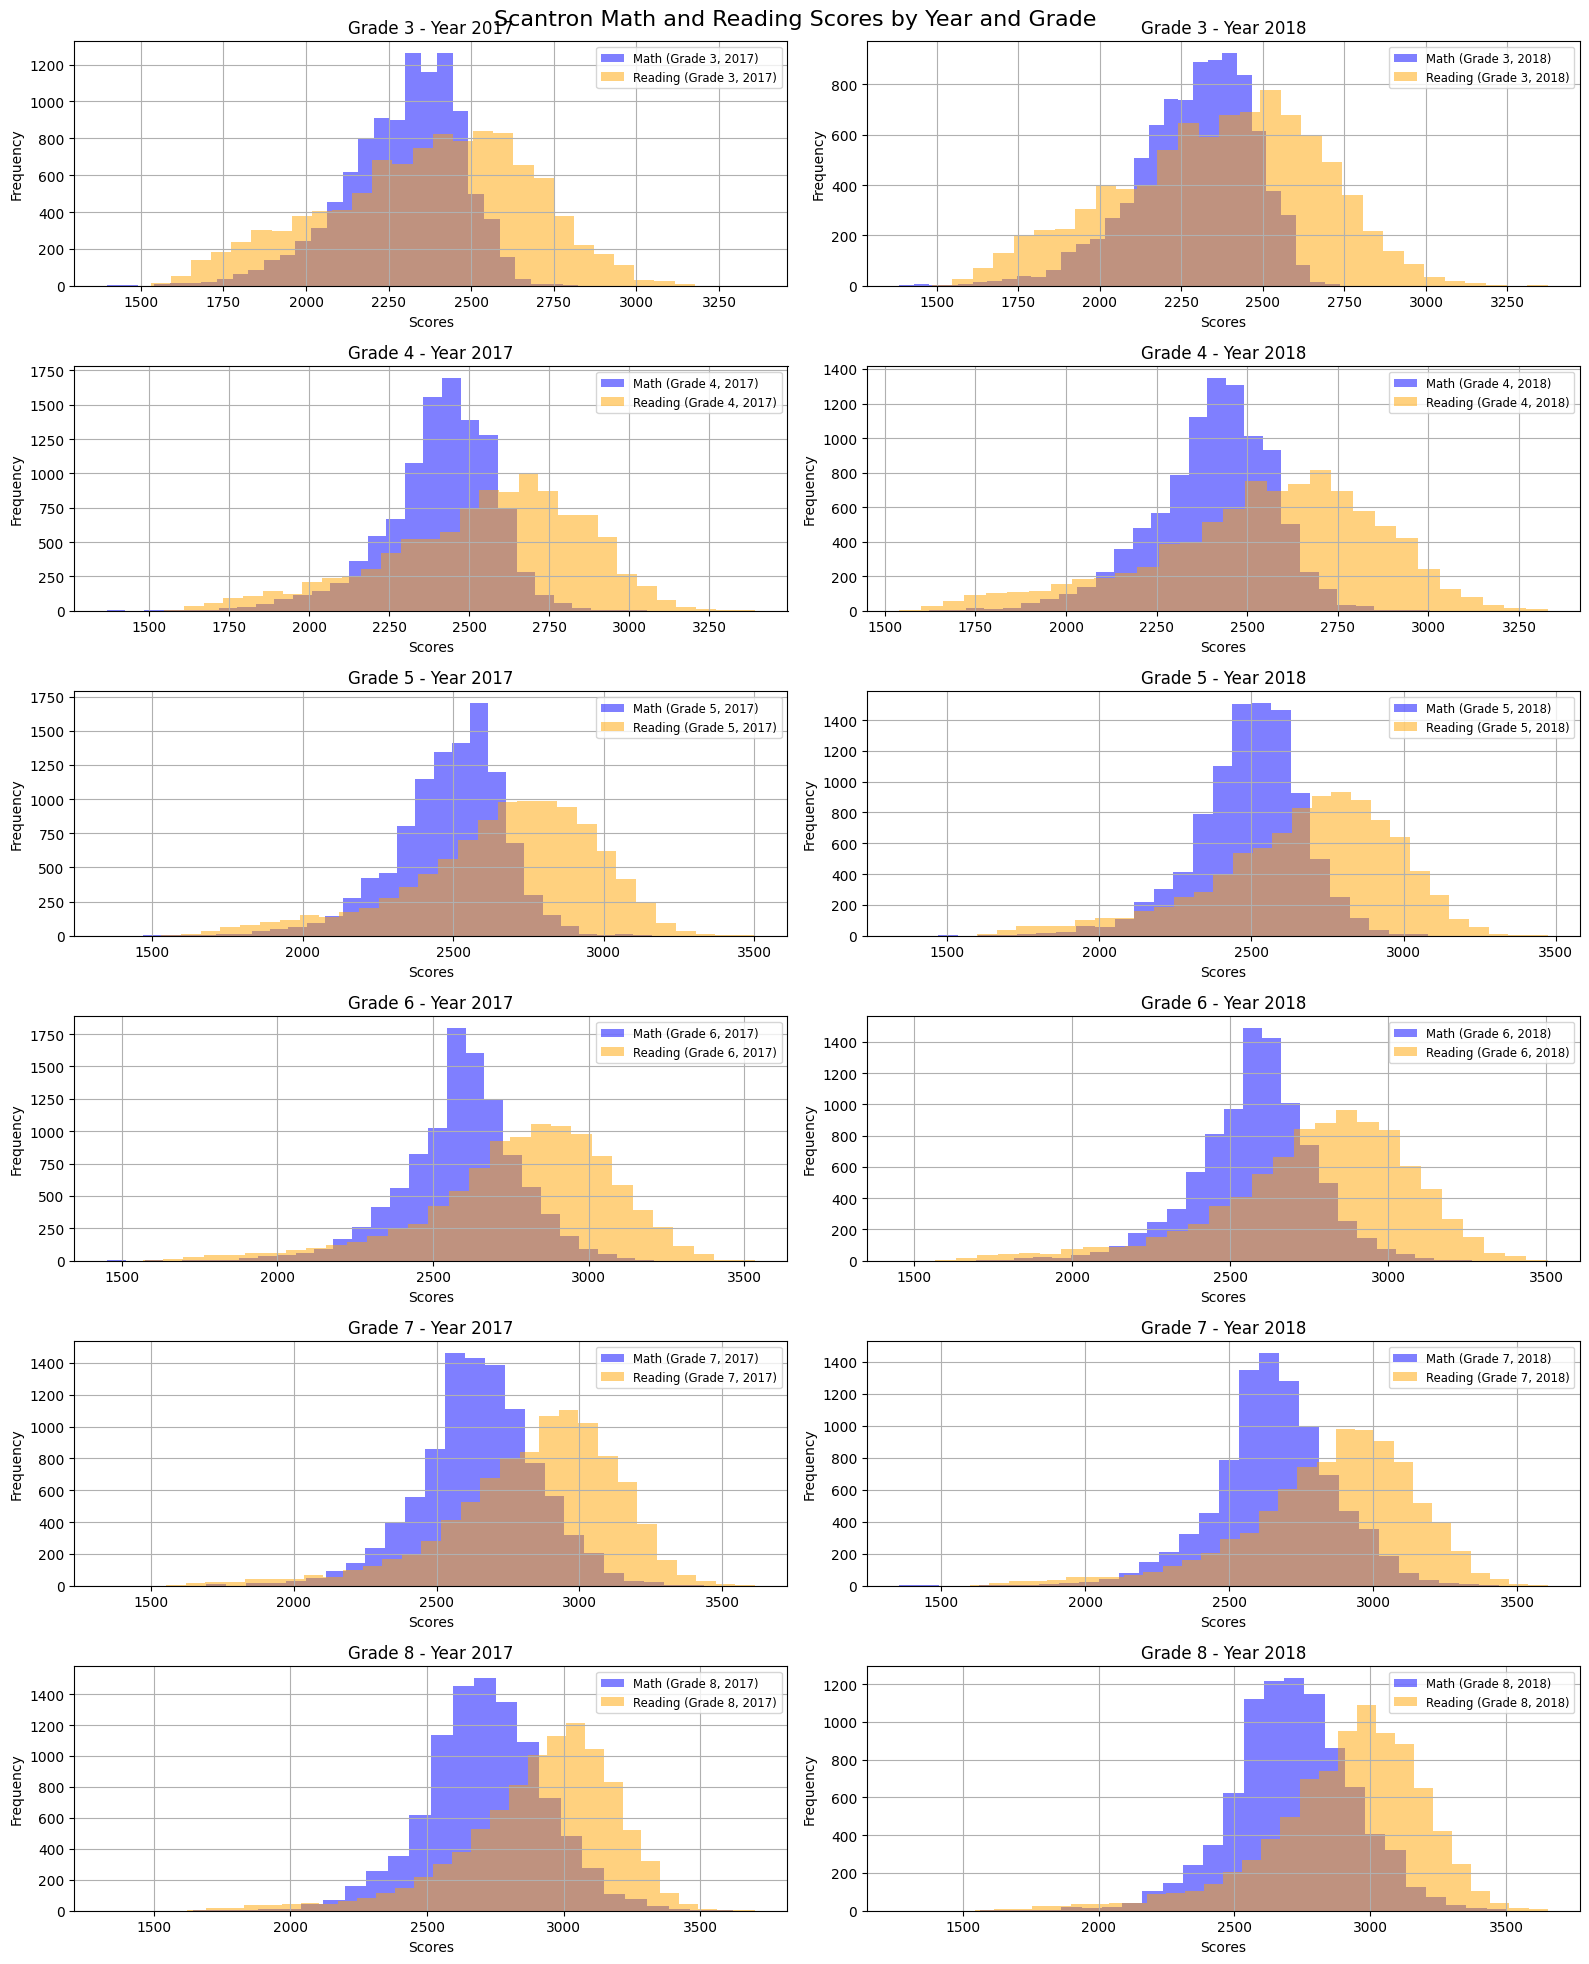

In [ ]:
# combine math/reading scantron graphs, still separated by grade and year

# List of grade levels
grades = [3, 4, 5, 6, 7, 8]

# Define the number of rows and columns for the subplot grid
n_rows = len(grades)  # One row for each grade
n_cols = 2  # One column for each year (2017 and 2018)
figsize = (16, 20)  # Adjust the figure size

# Create the figure and axes for the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
fig.suptitle('Scantron Math and Reading Scores by Year and Grade', fontsize=16)

# Flatten the axs array so we can index it linearly
axs = axs.flatten()

# Keep track of subplot position
plot_num = 0

# Loop through each grade level and year to combine scantronMath and scantronReading
for grade in grades:
    for year in ['2017', '2018']:

        # Select the current axis
        ax = axs[plot_num]

        # Get the corresponding Math and Reading DataFrames for the current year and grade
        math_key = f"scores_{year}_{grade}_value_scantronMath"
        reading_key = f"scores_{year}_{grade}_value_scantronReading"


        # Check if both Math and Reading DataFrames exist in the dictionary
        if math_key in scores_year_level_value and reading_key in scores_year_level_value:
            # Extract the data and filter non-zero values
            math_data = scores_year_level_value[math_key].values.flatten()
            math_data = math_data[math_data > 0]  # Filter non-zero values

            reading_data = scores_year_level_value[reading_key].values.flatten()
            reading_data = reading_data[reading_data > 0]  # Filter non-zero values

            # Ensure there is data to plot
            if len(math_data) > 0 and len(reading_data) > 0:
                # Plot Math and Reading histograms on the same axis
                ax.hist(math_data, bins=30, alpha=0.5, label=f'Math (Grade {grade}, {year})', color='blue')
                ax.hist(reading_data, bins=30, alpha=0.5, label=f'Reading (Grade {grade}, {year})', color='orange')

                # Add title and labels
                ax.set_title(f'Grade {grade} - Year {year}')
                ax.set_xlabel('Scores')
                ax.set_ylabel('Frequency')
                ax.grid(True)
                ax.legend(fontsize='small')

        # Move to the next subplot
        plot_num += 1

# Remove any unused subplots if there are fewer DataFrames than grid cells
for i in range(plot_num, len(axs)):
    fig.delaxes(axs[i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


<ipython-input-67-666ca5fdb817>:83: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


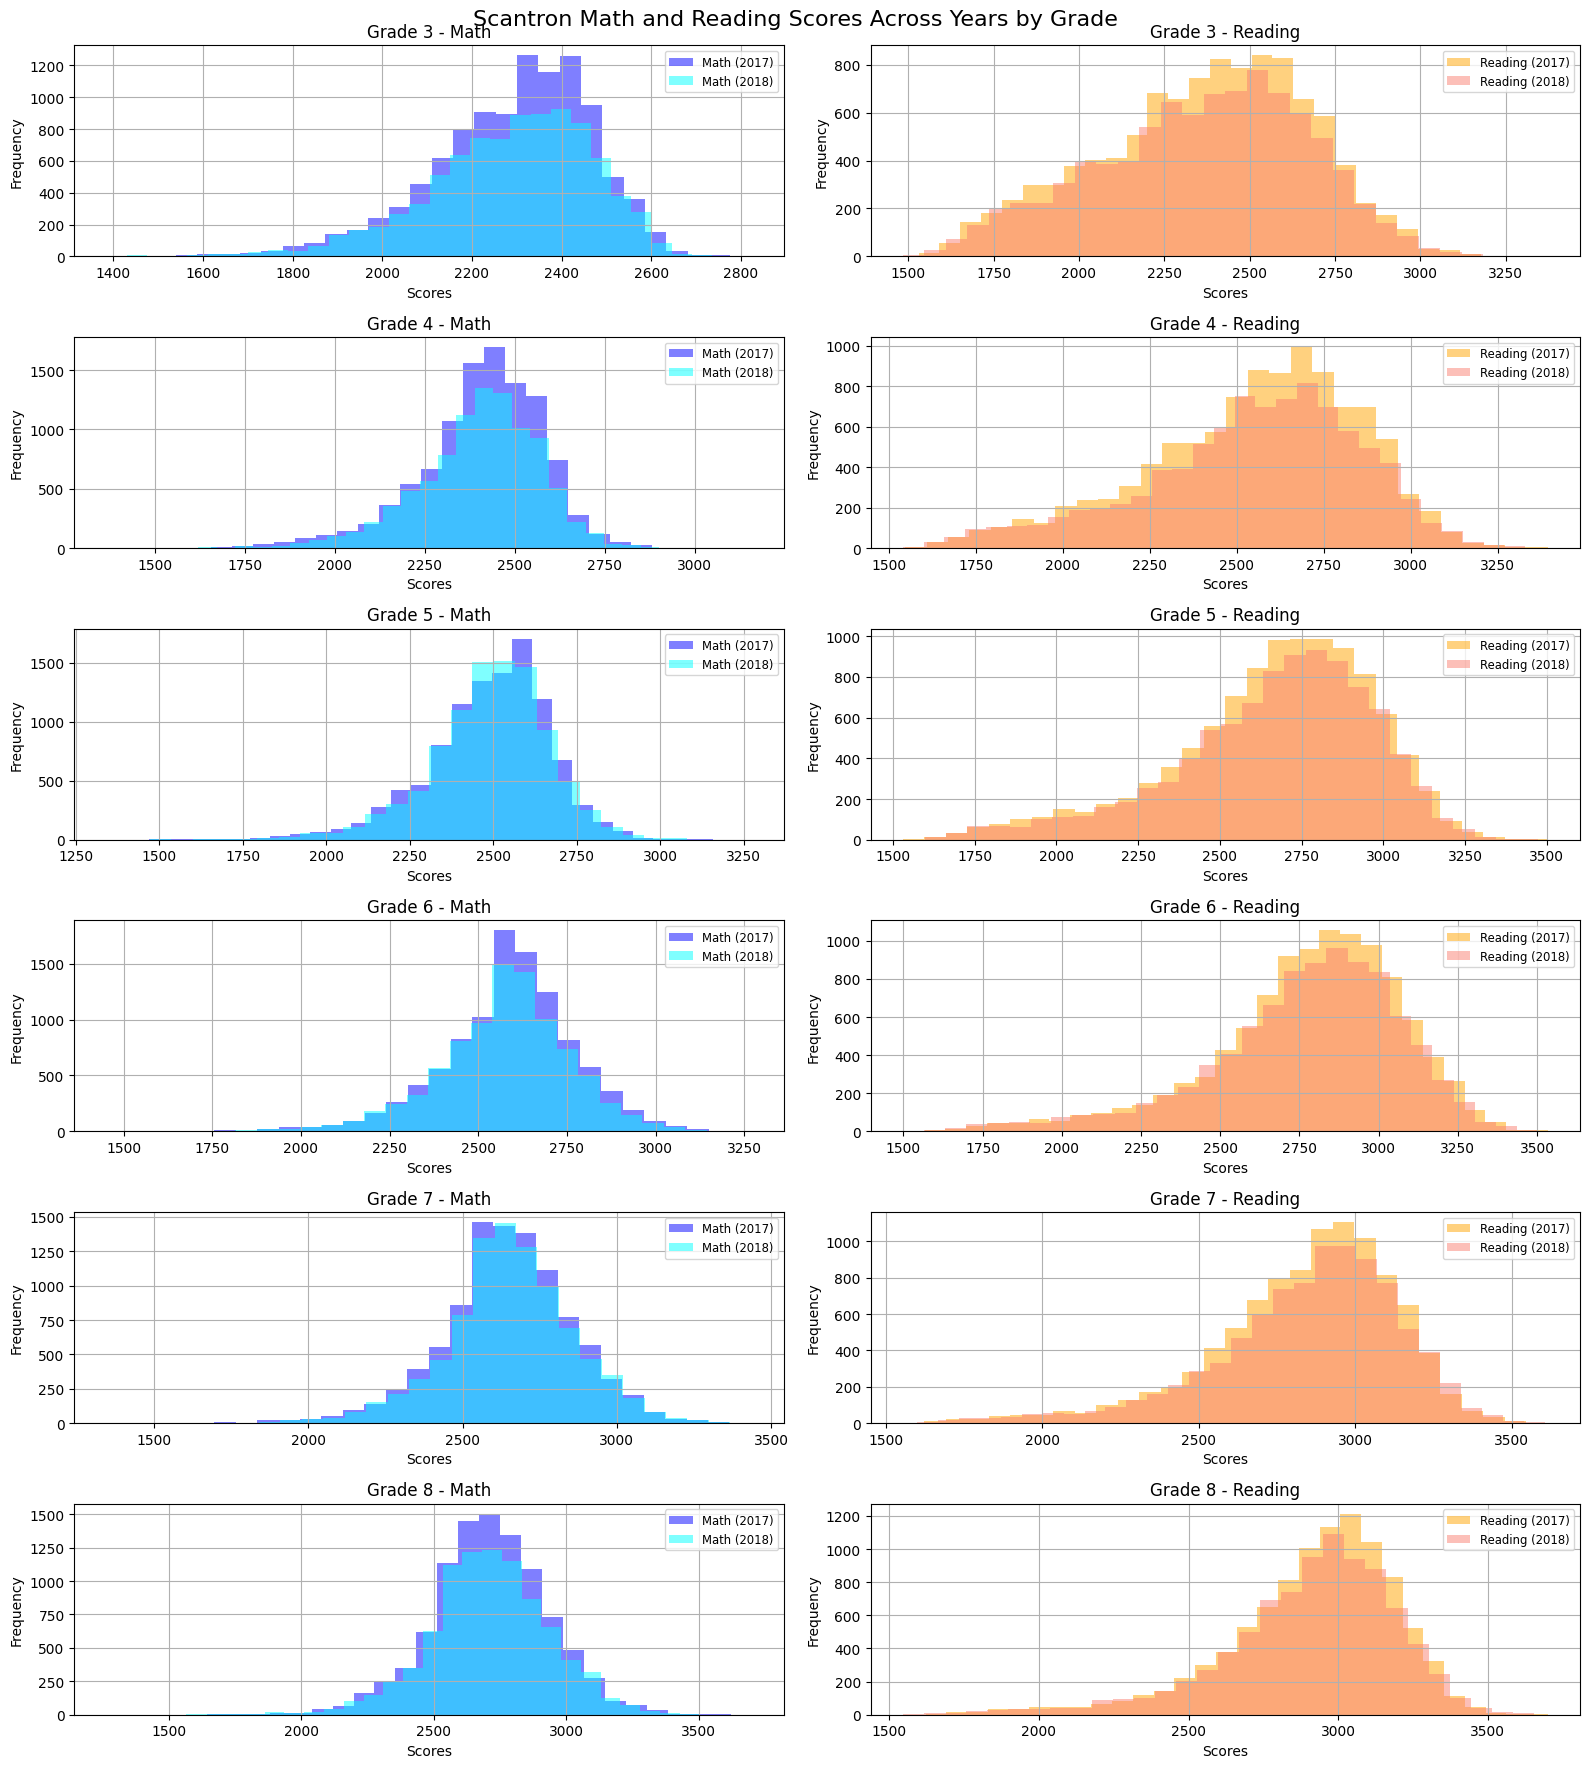

In [ ]:
# List of grade levels
grades = [3, 4, 5, 6, 7, 8]

# Define the number of rows and columns for the subplot grid
n_rows = len(grades)  # One row for each grade
n_cols = 2  # Two columns: one for Math and one for Reading
figsize = (16, n_rows * 3)  # Adjust the figure size

# Create the figure and axes for the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
fig.suptitle('Scantron Math and Reading Scores Across Years by Grade', fontsize=16)

# Keep track of subplot position
plot_num = 0

# Loop through each grade level
for grade in grades:
    # Select the current axes for Math and Reading
    ax_math = axs[plot_num, 0]  # Math plot
    ax_reading = axs[plot_num, 1]  # Reading plot

    # Initialize lists to hold data for both years
    math_data_2017 = []
    math_data_2018 = []
    reading_data_2017 = []
    reading_data_2018 = []

    # Get the corresponding Math and Reading DataFrames for the current grade and both years
    for year in ['2017', '2018']:
        math_key = f"scores_{year}_{grade}_value_scantronMath"
        reading_key = f"scores_{year}_{grade}_value_scantronReading"

        # Check if both Math and Reading DataFrames exist in the dictionary
        if math_key in scores_year_level_value:
            math_data = scores_year_level_value[math_key].values.flatten()
            math_data = math_data[math_data > 0]  # Filter non-zero values
            if year == '2017':
                math_data_2017 = math_data
            else:
                math_data_2018 = math_data

        if reading_key in scores_year_level_value:
            reading_data = scores_year_level_value[reading_key].values.flatten()
            reading_data = reading_data[reading_data > 0]  # Filter non-zero values
            if year == '2017':
                reading_data_2017 = reading_data
            else:
                reading_data_2018 = reading_data

    # Plot Math data for both years
    if len(math_data_2017) > 0:
        ax_math.hist(math_data_2017, bins=30, alpha=0.5, label='Math (2017)', color='blue')
    if len(math_data_2018) > 0:
        ax_math.hist(math_data_2018, bins=30, alpha=0.5, label='Math (2018)', color='cyan')

    # Add title and labels for Math plot
    ax_math.set_title(f'Grade {grade} - Math')
    ax_math.set_xlabel('Scores')
    ax_math.set_ylabel('Frequency')
    ax_math.grid(True)
    ax_math.legend(fontsize='small')

    # Plot Reading data for both years
    if len(reading_data_2017) > 0:
        ax_reading.hist(reading_data_2017, bins=30, alpha=0.5, label='Reading (2017)', color='orange')
    if len(reading_data_2018) > 0:
        ax_reading.hist(reading_data_2018, bins=30, alpha=0.5, label='Reading (2018)', color='salmon')

    # Add title and labels for Reading plot
    ax_reading.set_title(f'Grade {grade} - Reading')
    ax_reading.set_xlabel('Scores')
    ax_reading.set_ylabel('Frequency')
    ax_reading.grid(True)
    ax_reading.legend(fontsize='small')

    # Move to the next row
    plot_num += 1

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
scores_year_level_value.keys()

dict_keys(['scores_2017_3_value_scantronMath', 'scores_2017_3_value_scantronReading', 'scores_2017_3_value_MathMilestones', 'scores_2017_3_value_ELAMilestones', 'scores_2018_3_value_scantronMath', 'scores_2018_3_value_scantronReading', 'scores_2017_4_value_scantronMath', 'scores_2017_4_value_scantronReading', 'scores_2017_4_value_MathMilestones', 'scores_2017_4_value_ELAMilestones', 'scores_2018_4_value_scantronMath', 'scores_2018_4_value_scantronReading', 'scores_2017_5_value_scantronMath', 'scores_2017_5_value_scantronReading', 'scores_2017_5_value_MathMilestones', 'scores_2017_5_value_ELAMilestones', 'scores_2017_5_value_SocialMilestones', 'scores_2017_5_value_ScienceMilestones', 'scores_2018_5_value_scantronMath', 'scores_2018_5_value_scantronReading', 'scores_2017_6_value_scantronMath', 'scores_2017_6_value_scantronReading', 'scores_2017_6_value_MathMilestones', 'scores_2017_6_value_ELAMilestones', 'scores_2018_6_value_scantronMath', 'scores_2018_6_value_scantronReading', 'scores_

In [ ]:
benchmarks

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


In [ ]:
benchmarks['dataSource'].unique()

array(['value_scantronMath', 'value_scantronReading',
       'value_actCompositeScore', 'value_aspireReadingScaleScore',
       'value_starMath', 'value_actMathScore', 'value_actReadingScore',
       'value_actEnglishScore', 'value_actScienceScore'], dtype=object)

In [ ]:
scores.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'value_scantronMath', 'value_scantronReading', 'subgroup_specialEd',
       'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity',
       'subgroup_ell', 'subgroup_bottom25', 'value_actMathScore',
       'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_mapMath', 'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L